# Final Project: Crypto Currency from 2013 to 2021

Member of our team:

<table style='float:center'>
    <tr>
        <th>Fullname</th>
        <th>Student ID</th>
    </tr>
    <tr>
        <td>Đoàn Ánh Dương</td>
        <td>20127474</td>
    </tr>
</table>




---

## Import Library

Necessary file imported here.

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
from dateutil import relativedelta

import os
import glob

Environment using within this final project.

In [3]:
import sys
sys.executable

'/home/duong/anaconda3/envs/min_ds-env/bin/python'

Set options here.

In [4]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', '{:.2f}'.format)

---

## I. Idea and Expectation
### Idea
For recent years, we have been heard at least once about crypto, particuarly Bitcoin and its application. Although digital currency brought many controversial opinions up to now, we cannot realize its success and popularity. 

So I decided to deep in crypto market and fortunately, I found the historical price data of crypto currency on Kaggle. Although the data does not contain all information about a specific coin, the historical price can bring us to take an overview of digital currency evolution.

Throughout this project, I hope that we can have a perspective objectively and a basic knowledge about digital currency.
### Expectation
In this project, we will find out the crypto currency market and its history, with expectation that we can find a method to buy a coin and take profit. 

## II. Datasets and Collection

### Source and Public Data
I found the datasets used in this project was public on [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory): Crypto Currrency price history.

### License
The data is taken from [coinmarketcap](https://coinmarketcap.com/) and it is [free](https://coinmarketcap.com/faq/) to use the data.

More about the license I found on kaggle: 
- CC0: Public Domain ([No copyright](https://creativecommons.org/publicdomain/zero/1.0/))

### About Data
The dataset has one csv file for each currency. **Price history is available on a daily basis from <font color = 'green'>*April 28, 2013*</font>**. This dataset has the historical price information of some of the top crypto currencies by market capitalization, including Bitcoin, Etherium, Binance Coin,...

### Description 
All information of columns contain in the file named `description.txt`.

### Author
Datasets were collected by Sudalai Rajkumar(registered account name [SRK](https://www.kaggle.com/sudalairajkumar)) on Kaggle.

### How did the author collect data?
As the author's answer, there is not mentioned clearly how the way he collected data, maybe collected by scraping historical data web. For instance: [bitcoin](https://coinmarketcap.com/currencies/bitcoin/historical-data/).

### Is dataset subjective or objective?
Besides the historical price of digital currency, there are many factors in a coin we need to take consideration on. For example: Holders Statistic over time, legality, team and organization investors, who created the coin... 

So that the dataset is subjective.

---

## III. Preprocessing Data

### 1. Change files.

First, we cannot access each files to analyze, it must be combined into one.

#### How many files does we have?

In [5]:
path = 'archive/'
os.chdir(path)
ext = 'csv'
all_files = [f for f in glob.glob(f'*.{ext}')]

print(f'Containing number of files: {len(all_files)}.')
print(all_files)

os.chdir('../')

Containing number of files: 23.
['coin_XRP.csv', 'coin_Ethereum.csv', 'coin_Aave.csv', 'coin_USDCoin.csv', 'coin_Solana.csv', 'coin_EOS.csv', 'coin_WrappedBitcoin.csv', 'coin_Cardano.csv', 'coin_NEM.csv', 'coin_Tron.csv', 'coin_CryptocomCoin.csv', 'coin_BinanceCoin.csv', 'coin_Iota.csv', 'coin_ChainLink.csv', 'coin_Monero.csv', 'coin_Dogecoin.csv', 'coin_Tether.csv', 'coin_Bitcoin.csv', 'coin_Cosmos.csv', 'coin_Litecoin.csv', 'coin_Stellar.csv', 'coin_Polkadot.csv', 'coin_Uniswap.csv']


#### Are there duplicated in each files? 

Lets check duplicated rows.

In [6]:
for f in all_files:
    temp = pd.read_csv(path+f)
    print(f'duplicated in {f}:', temp.index.duplicated().sum())

duplicated in coin_XRP.csv: 0
duplicated in coin_Ethereum.csv: 0
duplicated in coin_Aave.csv: 0
duplicated in coin_USDCoin.csv: 0
duplicated in coin_Solana.csv: 0
duplicated in coin_EOS.csv: 0
duplicated in coin_WrappedBitcoin.csv: 0
duplicated in coin_Cardano.csv: 0
duplicated in coin_NEM.csv: 0
duplicated in coin_Tron.csv: 0
duplicated in coin_CryptocomCoin.csv: 0
duplicated in coin_BinanceCoin.csv: 0
duplicated in coin_Iota.csv: 0
duplicated in coin_ChainLink.csv: 0
duplicated in coin_Monero.csv: 0
duplicated in coin_Dogecoin.csv: 0
duplicated in coin_Tether.csv: 0
duplicated in coin_Bitcoin.csv: 0
duplicated in coin_Cosmos.csv: 0
duplicated in coin_Litecoin.csv: 0
duplicated in coin_Stellar.csv: 0
duplicated in coin_Polkadot.csv: 0
duplicated in coin_Uniswap.csv: 0


So there is no duplicated rows. We carry out combining files.

In [7]:
combined_csv = pd.concat([pd.read_csv(path + fname) for fname in all_files])
print('duplicated in combine files: ', combined_csv.index.duplicated().sum())

duplicated in combine files:  34091


Why the combined files take duplicated? Because column 'SNo' is the index starting with $1$ for each files. So we must reset the index in combined files. 

In [8]:
combined_csv.drop('SNo',1,inplace = True)
combined_csv.to_csv('crypto_finance.csv', index=False)

combined_csv = pd.read_csv('crypto_finance.csv')
combined_csv.index.rename('SNo', inplace = True)
combined_csv.to_csv('crypto_finance.csv')

### 2. Pre-processing

Read new file. Let's see some values.

In [9]:
cryp_df = pd.read_csv('crypto_finance.csv', index_col='SNo')

cryp_df.sample(10)

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
19396,Chainlink,LINK,2021-05-28 23:59:59,32.170084,26.944206,31.657591,27.951693,3.119953e+09,1.200552e+10
3781,Ethereum,ETH,2018-01-12 23:59:59,1296.040039,1120.089966,1158.290039,1273.199951,5.222300e+09,1.234269e+11
32540,Litecoin,LTC,2017-09-03 23:59:59,82.829803,73.608498,78.979897,76.843002,6.754620e+08,4.054990e+09
22145,Dogecoin,DOGE,2014-04-02 23:59:59,0.000547,0.000421,0.000536,0.000429,1.385560e+06,2.855699e+07
28711,Bitcoin,BTC,2017-09-10 23:59:59,4245.439941,3951.040039,4229.339844,4122.939941,1.679090e+09,6.826383e+10
17226,IOTA,MIOTA,2019-04-04 23:59:59,0.354050,0.329878,0.339609,0.337164,2.285234e+07,9.371566e+08
21917,Monero,XMR,2021-03-08 23:59:59,221.083887,204.301017,208.657998,221.007186,6.709148e+08,3.946686e+09
6210,USD Coin,USDC,2021-03-09 23:59:59,1.002861,0.999958,0.999984,1.000074,1.683030e+09,8.982653e+09
26151,Tether,USDT,2018-11-15 23:59:59,0.992574,0.962447,0.972578,0.982022,4.956910e+09,1.675744e+09


More information about dataset.

In [10]:
cryp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37082 entries, 0 to 37081
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       37082 non-null  object 
 1   Symbol     37082 non-null  object 
 2   Date       37082 non-null  object 
 3   High       37082 non-null  float64
 4   Low        37082 non-null  float64
 5   Open       37082 non-null  float64
 6   Close      37082 non-null  float64
 7   Volume     37082 non-null  float64
 8   Marketcap  37082 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.8+ MB


#### How many rows and columns in the file?

In [11]:
cryp_df.shape

(37082, 9)

There are 37082 rows and 9 columns.

#### What is the meaning of each row (sample)?

The dataset shows that each samples contain the information of a specific coin at each time.

#### Does the data have duplicated samples?

In [12]:
cryp_df.index.duplicated().sum()

0

There is no duplicated samples.

#### What does each column mean? 

In [13]:
f = open('description.txt', 'r')
print(f.read())
f.close()

1) SNo:         Serial Number.
2) Name:        Name of coin.
3) Symbol:      Symbol of coin.
4) Date:        Date of observation.
5) Open:        Opening price on the given day.
6) High:        Highest price on the given day.
7) Low:         Lowest price on the given day.
8) Close:       Closing price on the given day.
9) Volume:      Volume of transactions on the given day (in USD).
10) Market Cap: Market capitalization in USD.


#### Check the data types? 

In [14]:
cryp_df.dtypes

Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

Overall, all the column types is correct except `Date`. We need to change `Date` column to appropriate type (`datetime`).

In [15]:
cryp_df['Date'] = pd.to_datetime(cryp_df['Date'], format="%Y-%m-%d %X")

#### With the numeric columns, how are values distributed? Is there any abnormal value?

In [16]:
nume_cols_df = cryp_df.describe(include=['number', 'datetime'], datetime_is_numeric=True)
nume_cols_df.loc['missing_ratio'] = cryp_df.agg(lambda x: x.isna().mean()*100)

nume_cols_df

,Date,High,Low,Open,Close,Volume,Marketcap
count,37082,37082.000000,37082.000000,37082.000000,37082.000000,3.708200e+04,3.708200e+04
mean,2018-08-16 07:12:30.221616896,1016.058015,952.987707,985.323755,987.120511,3.022542e+09,1.542943e+10
min,2013-04-29 23:59:59,0.000089,0.000079,0.000086,0.000086,0.000000e+00,0.000000e+00
25%,2017-03-05 23:59:59,0.075664,0.069536,0.072456,0.072648,4.937190e+06,2.395955e+08
50%,2019-01-09 23:59:59,1.008733,0.999850,1.001157,1.001138,8.512805e+07,1.405335e+09
75%,2020-05-13 23:59:59,31.916399,28.996246,30.459673,30.512205,9.388489e+08,5.159305e+09
max,2021-07-06 23:59:59,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12
std,NaN,5249.503670,4907.932082,5088.101367,5093.703878,1.190963e+10,7.059128e+10
missing_ratio,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


There is no missing value in DataFrame. But it exists abnormal values in `min` row of `Volume` and `Marketcap` col.

So, lets take a look at these columns.

In [17]:
check_df = cryp_df[(cryp_df['Marketcap'] == 0) | (cryp_df['Volume'] == 0)]
check_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
0,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07
1,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07
2,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07
3,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07
4,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07
...,...,...,...,...,...,...,...,...,...
36477,Polkadot,DOT,2020-08-28 23:59:59,6.333746,5.540963,5.639486,6.159955,7.271622e+08,0.000000e+00
36478,Polkadot,DOT,2020-08-29 23:59:59,6.562906,6.042309,6.175925,6.159143,5.272900e+08,0.000000e+00
36479,Polkadot,DOT,2020-08-30 23:59:59,6.219506,5.749978,6.153440,5.869881,4.853351e+08,0.000000e+00


We got some problems here: Abnormal values on `Volume` and `Marketcap` col. We can calculate the ratio of abnormal values to decide whether to drop or not.

In [18]:
abn_df = check_df.groupby(['Symbol']).size()

all_df = cryp_df.groupby(['Symbol']).size()

(abn_df/all_df *100).dropna()

Symbol
AAVE     0.363636
ATOM     5.443787
BTC      8.090939
CRO      0.213904
DOGE     0.398551
DOT      3.750000
EOS      0.068213
LTC      8.090939
SOL     11.504425
TRX      1.005747
USDC     0.798403
WBTC    22.072072
XRP      4.977532
dtype: float64

As the results, the number of invalid values is quite small, we can delete samples containing invalid values. But once we dropped it, we will face the intermittence of time data. So I decided not to drop.

#### With the categorical columns, how are the values distributed? Is there any abnormal value? 

In [19]:
cate_cols = cryp_df.describe(include=[object]).columns

cate_cols_df = cryp_df[cate_cols].agg([
    lambda x: x.isna().mean() *100, 
    pd.Series.nunique, 
    pd.Series.unique])

cate_cols_df.rename(index ={
    '<lambda>': 'missing_ratio',
    'nunique':'num_dif_val',
    'unique':'diff_vals'
})

,Name,Symbol
missing_ratio,0.0,0.0
num_dif_val,23,23
diff_vals,"[XRP, Ethereum, Aave, USD Coin, Solana, EOS, Wrapped Bitcoin, Cardano, NEM, TRON, Crypto.com Coin, Binance Coin, IOTA, Chainlink, Monero, Dogecoin, Tether, Bitcoin, Cosmos, Litecoin, Stellar, Polkadot, Uniswap]","[XRP, ETH, AAVE, USDC, SOL, EOS, WBTC, ADA, XEM, TRX, CRO, BNB, MIOTA, LINK, XMR, DOGE, USDT, BTC, ATOM, LTC, XLM, DOT, UNI]"


There is no missing value in categorical columns. Everything seems to be fine.

## IV. Data Exploratory and Analysis. 

### Data Exploratory

which coin is stable/unstable?
- A stablecoin is a digital currency that is pegged to a "stable" reserve asset like the U.S dollar.
- A unstable coin is a digital currency that has high price volatility, high inflation and weak economy.


#### Middle-term Investor (Month)

##### Preprocess

Now we are carrying out calculating the volatility of each coin month by month.

In [236]:
last_dom_prep = cryp_df.reset_index('SNo').drop(['SNo','Symbol'],1)
last_dom_prep['Month'] = last_dom_prep.Date.dt.month
last_dom_prep['Year'] = last_dom_prep.Date.dt.year

last_dom = last_dom_prep.groupby(['Name','Year','Month'])['Date'].max().reset_index()

#make condition
Name = (cryp_df['Name'].isin(last_dom['Name']))
date = (cryp_df['Date'].isin(last_dom['Date']))

#gat all cols of last date each month and each Name.
last_dom_df = last_dom_prep[Name & date]
last_dom_df=last_dom_df.drop(['Month','Year'],1)

#find min date and max date of each coin => delete min date and duplicate max date.
min_max = last_dom_df[['Name','Date']].groupby('Name').agg([min,max])
min_max = min_max.reset_index(col_level=1).droplevel(level=0,axis=1).set_index(['Name','min'])

substr = last_dom_df.set_index(['Name','Date']).drop(index=min_max.index)

min_max = min_max.reset_index().set_index(['Name','max'])
besubstr = last_dom_df.set_index(['Name','Date']).drop(index=min_max.index).reset_index()

#increase to end of next month
besubstr = besubstr.assign(
    Date = besubstr.Date + pd.Timedelta(days=1)
    )

besubstr = besubstr.assign(
    Date = besubstr.Date.apply(
        lambda x:x+ relativedelta.relativedelta(months=1)
        )
    )

besubstr = besubstr.assign(
    Date = besubstr.Date - pd.Timedelta(days=1)
    )
besubstr = besubstr.set_index(['Name','Date'])

#calculating the volatility
res = ((substr - besubstr)*100/besubstr).reset_index()
res = pd.pivot(res, columns = 'Name',index='Date',values='Close')

res



Name,Aave,Binance Coin,Bitcoin,Cardano,Chainlink,Cosmos,Crypto.com Coin,Dogecoin,EOS,Ethereum,...,NEM,Polkadot,Solana,Stellar,TRON,Tether,USD Coin,Uniswap,Wrapped Bitcoin,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2013-05-31 23:59:59,NaN,NaN,-7.194245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-30 23:59:59,NaN,NaN,-25.105428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-31 23:59:59,NaN,NaN,9.808100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31 23:59:59,NaN,NaN,27.580366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-30 23:59:59,NaN,NaN,-1.736244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.118035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 23:59:59,17.962651,106.605778,-1.983501,13.340260,29.904701,18.930354,-8.210962,529.105892,33.862844,44.561196,...,-7.944032,-1.313496,120.680681,28.870459,43.241110,-0.001135,0.021877,45.418800,-2.008534,177.358124
2021-05-31 23:59:59,-13.861344,-43.223781,-35.354564,28.860927,-15.840958,-38.427119,-36.641910,-3.481047,3.160672,-2.100881,...,-44.645530,-35.877113,-23.604979,-23.817326,-41.827906,0.052419,0.044035,-30.291554,-35.398383,-34.246312
2021-06-30 23:59:59,-34.639432,-14.402834,-6.139409,-20.616898,-39.239339,-14.224586,-8.173372,-21.974458,-37.777659,-16.221234,...,-31.126707,-29.997673,8.350011,-29.853028,-11.406481,-0.031692,-0.017570,-32.045981,-6.154983,-32.506669


##### Visualization

Visualizing the volatility of each coin to observe clearly. From now on, we can assume a coin is stable if its volatility is not beyond to $[-5,5]$ and the data is enough for our decisions.

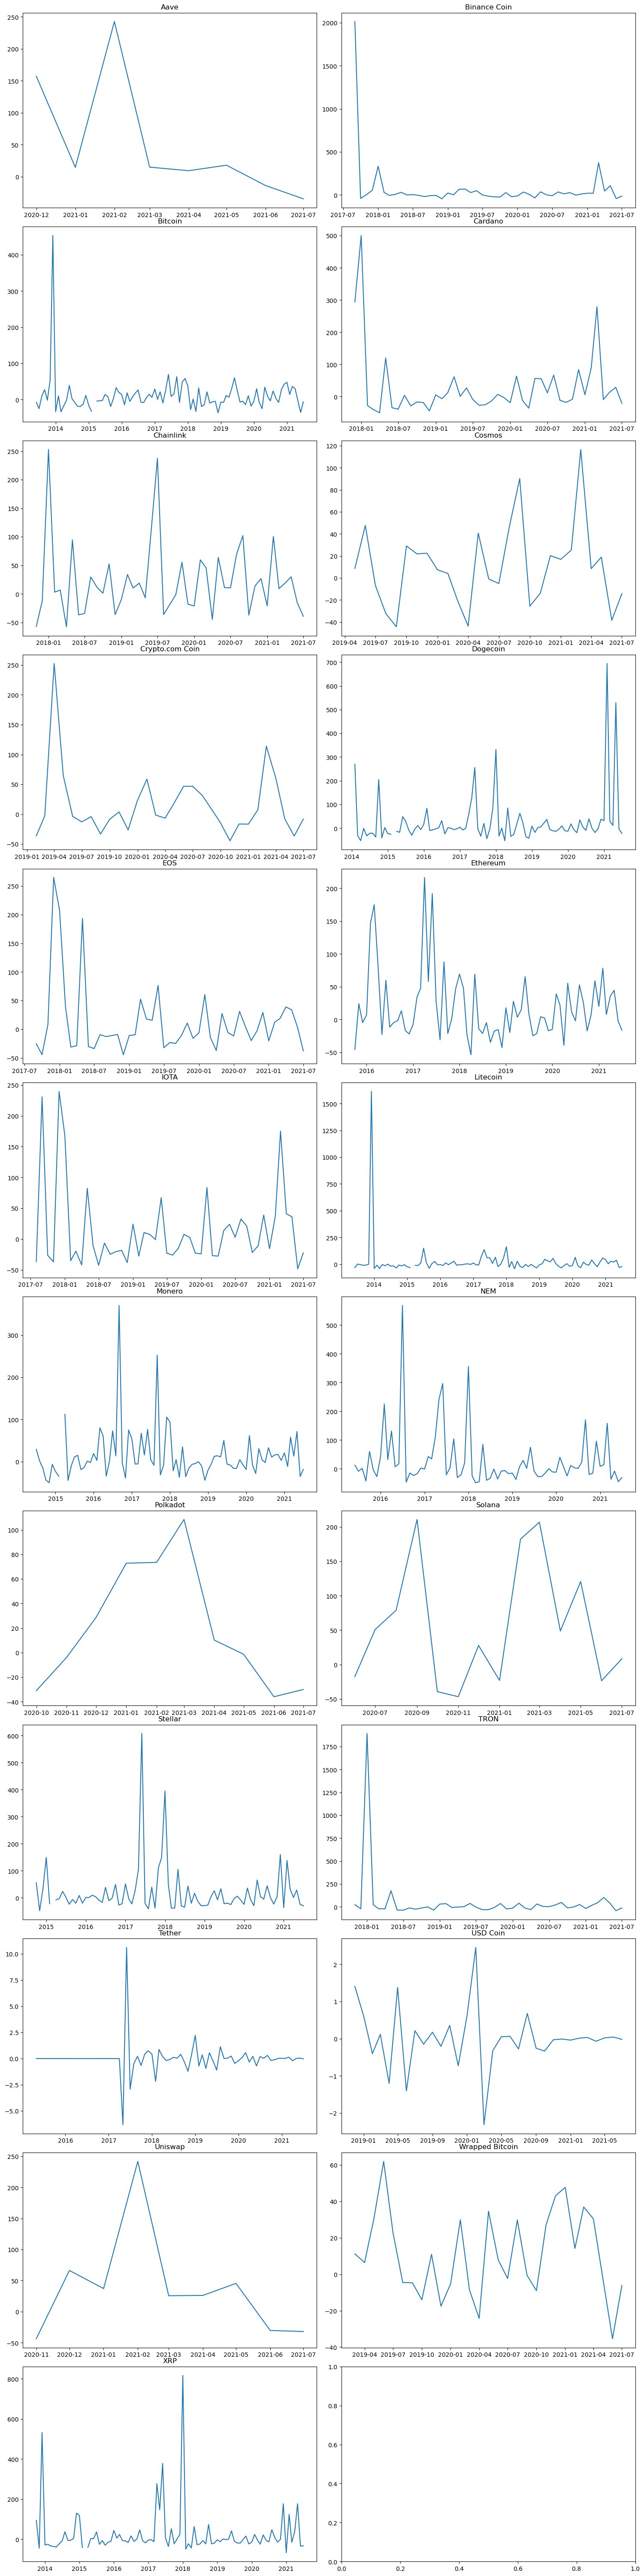

In [237]:
fig, axs = plt.subplots(int(res.columns.size/2 + 1),2, figsize=(15,60))
fig.tight_layout()
for i in range(res.columns.size):
    axs[int(i/2),i%2].plot(res[res.columns.values[i]])
    axs[int(i/2),i%2].set_title(res.columns.values[i])

#### Long-term Investor (Year)

We could take a look at the vilatility year by year if we are a long-term investor.

##### Pre-processing

In [241]:
res1 = ((substr-besubstr)*100/besubstr).reset_index()

#groupby year
res1['Year'] = res1.Date.dt.year
res1 = res1[['Name','Year','Close']].groupby(['Name','Year']).agg([np.std,np.size])\
                                                            .reset_index(col_level=1)
res1 = res1.droplevel(level=0,axis=1)

#Monthly volatility = standard deviation of month-base volatility.
#Annual volatility = Monthly Volatility * sqrt(num time period)
res1['AnnualVola'] = res1['std']*np.sqrt(res1['size'])
res1 = pd.pivot(res1, columns = 'Name',index='Year',values='AnnualVola')
res1

Name,Aave,Binance Coin,Bitcoin,Cardano,Chainlink,Cosmos,Crypto.com Coin,Dogecoin,EOS,Ethereum,...,NEM,Polkadot,Solana,Stellar,TRON,Tether,USD Coin,Uniswap,Wrapped Bitcoin,XRP
Year,,,,,,,,,,,,,,,,,,,,,
2013,NaN,NaN,457.109181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539.563746
2014,NaN,NaN,66.556166,NaN,NaN,NaN,NaN,362.003329,NaN,NaN,...,NaN,NaN,NaN,162.539517,NaN,NaN,NaN,NaN,NaN,199.281864
2015,NaN,NaN,66.726704,NaN,NaN,NaN,NaN,86.039260,NaN,59.311735,...,96.102720,NaN,NaN,58.689299,NaN,0.000000,NaN,NaN,NaN,100.429210
2016,NaN,NaN,49.309806,NaN,NaN,NaN,NaN,95.502047,NaN,236.411589,...,600.502428,NaN,NaN,93.278866,NaN,0.006333,NaN,NaN,NaN,65.282208
2017,NaN,1955.111950,95.957177,206.464997,290.086523,NaN,NaN,410.123269,320.308490,262.211431,...,459.309983,NaN,NaN,688.910700,1892.737961,13.311229,NaN,NaN,NaN,869.089489
2018,NaN,73.193491,70.876683,158.615169,147.557427,NaN,NaN,151.124506,222.328876,124.953128,...,122.565094,NaN,NaN,158.527085,203.551788,3.668578,0.795658,NaN,NaN,132.638788
2019,NaN,119.253488,77.494807,85.825074,267.470088,88.550594,272.493451,56.080850,113.331961,88.975236,...,103.686407,NaN,NaN,69.377906,85.089444,2.223591,2.669780,NaN,76.247803,62.627851
2020,142.704238,72.601705,79.796929,141.519815,156.576276,127.325853,109.703283,76.319909,97.297391,103.716362,...,192.908441,89.340022,242.260489,187.488532,85.112881,1.125439,3.647628,98.530297,81.547819,204.431611
2021,287.504510,430.664039,74.921018,318.187039,135.334441,150.046174,157.141160,901.397567,78.032515,98.454019,...,215.813788,164.222431,266.540549,173.644518,141.507427,0.321865,0.118152,285.846007,75.285197,252.159734


##### Visualization

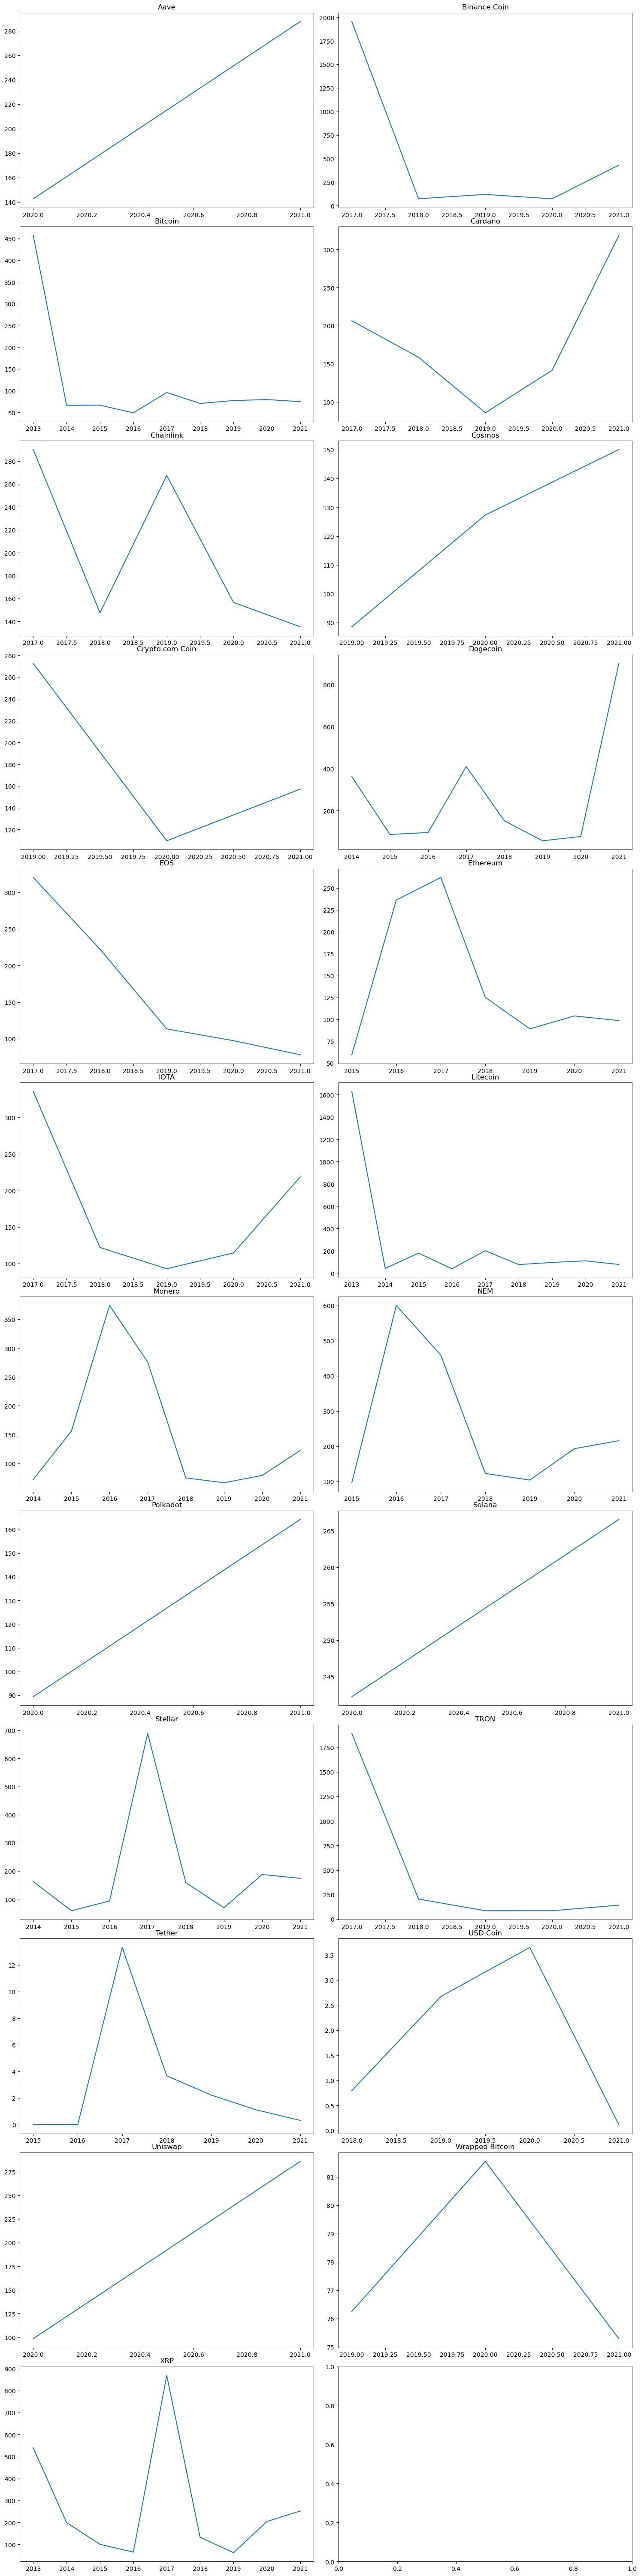

In [242]:
fig, axs = plt.subplots(int(res1.columns.size/2 + 1),2, figsize=(15,60))
fig.tight_layout()
for i in range(res1.columns.size):
    axs[int(i/2),i%2].plot(res1[res1.columns.values[i]])
    axs[int(i/2),i%2].set_title(res1.columns.values[i])

#### Conclusion

Before deciding to invest a digital currency, investors must save their capital. How to save their own capital while almost digital currencies have a high volatility?
$\Rightarrow$ They must find and reserve in a stable coin.

According to the result, we can consider which one is a stablecoin. Here we have the coins take least volatility whether investors is middle-term or long-term:
- Tether.
- USD Coin.

### Propose meaningful question & answer.

After preprocessing, we had an overview about the dataset. Lets turn back to our purpose. There are 2 main questions we must answer:
- How does the price fluctuations of currencies correlate with each other?
- Which coins do we need to take consideration?


#### 1. How does the price fluctuations of currencies correlate with each other?

With this question, we could know how the digital currency work. The answer of this question tells us we should invest alternative coins or bitcoin.

In [ ]:
a = np.array([1,2,3])
np.append(a, 4)
a

array([1, 2, 3])